In [17]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt

In [36]:
#Simple Two Features Data With 0 / 1 Label

data = [[2, 1.5, 0],
        [2.5, .5, 0],
        [3.5, 2, 1],
        [4.5, 2, 1],
        [3, 1.5, 1],
        [1.5, 2, 0],
        [4, 1.5, 1],
        [5, 2.5, 1],
        [3, .5, 0],
        [1.5, .5, 0]]

test_value = [3.5, 2, 1]

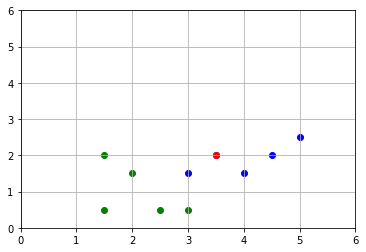

In [40]:
#plot data

def viz_data():
    plt.axis([0,6,0,6])
    plt.grid()
    for i in range(len(data)):
        point = data[i]
        color = "b"
        if point[2] == 0:
            color = "g"
        plt.scatter(point[0], point[1], c=color)
    plt.scatter(test_value[0], test_value[1], c="r")

viz_data()

In [13]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derv(x):
    return sigmoid(x) * (1 - sigmoid(x))

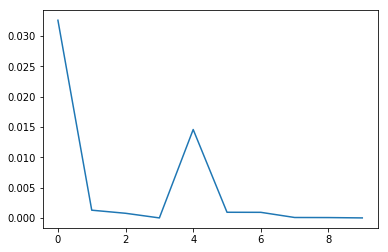

In [19]:
#Training loop

learning = 0.1
cost_list = []

for i in range(10000):
    index = np.random.randint(len(data))
    entity = data[index]

    z = entity[0] * w1 + entity[1] * w2 + b
    pred = sigmoid(z)

    target = entity[2]
    cost = np.square(pred - target)

    if i % 1000 == 0:
        cost_list.append(cost)
        #print(cost_list.append(cost))
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_derv(z)
    dz_dw1 = entity[0]
    dz_dw2 = entity[1]
    dz_db = 1

    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    dcost_db = dcost_pred * dpred_dz * dz_db

    w1 = w1 - learning * dcost_dw1 
    w2 = w2 - learning * dcost_dw2 
    b = b - learning * dcost_db
    
plt.plot(cost_list)

In [22]:
#weights and bias values after gradient descent cost minimizing

print(w1,w2,b)

(3.5796884208761033, 3.3507330515547533, -14.240162251935173)


In [32]:
#predict some unknown values

pz = test_value[0]*w1 + test_value[1]*w2 + b
pred = sigmoid(pz)
print(pred)

0.9932417715906146


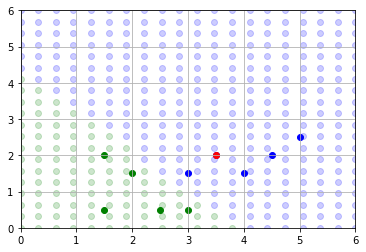

In [43]:
#plot prediction result in 2D plane

for x in np.linspace(0,6,20):
    for y in np.linspace(0,6,20):
        pred = sigmoid(w1*x+w2*y+b)
        c = "g"
        if pred > .5:
            c = "b"
        plt.scatter([x],[y],c = c, alpha = .2)

viz_data()